In [ ]:
!pip install --upgrade pandas

In [ ]:
!pip install --upgrade pandas-datareader

# **Stock Market Analysis Using Python** 


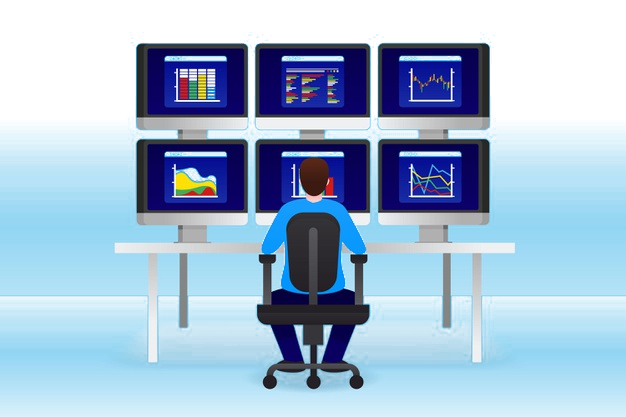

### **Business Scenario:**

Data Science extracts meaningful insight from chunks of raw data, which is useful to different business segments for planning their future course of action. 
**Finance** is probably one of the first to catch on to this trend with a rise in the penetration of analytics into many aspects of our lives. 
However, we will analyse data from the stock market for some technology stocks such as **Apple**, **Google**,  **Amazon** and **Microsoft**


### **Objective**:

Use Python libraries such as Pandas, Seaborn and Matplotlib to extract and analyse the information, visualise it, and look at different ways to analyse the risk of a stock, based on its performance history.

### About the Data:

The stocks I have chosen are from various industries and market caps namely,


*   Apple
*   Google
*   Microsoft
*   Amazon

For the start, we shall investigate the Amazon stock individually and then move on to the combined analysis. 

In [34]:
#Python Data Analysis imports
import pandas as pd
from pandas import Series,DataFrame
import numpy as np

#Visualisation imports
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot

import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline


#To grab stock data
from datetime import datetime

In [35]:

#Setting the end date to today
end = datetime.now()
print("End date:", end ) 

# Start date set to 1 year back
start = datetime(end.year-1, end.month, end.day)
print("start Date :" ,start)

End date: 2022-09-17 11:41:03.091893
start Date : 2021-09-17 00:00:00


In [36]:
import pandas as pd
import pandas_datareader.data as pd_data

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


Creating a list with the stock names, for future looping

In [37]:
#We're going to analyse stock info for Apple, Google, Microsoft and Amazon.
tech_list = ['AAPL','GOOG','MSFT','AMZN']

### Reading the data directly from **Yahoo finance website**.

In [38]:
#Using Yahoo Finance to grab the stock data
for stock in tech_list:
    globals()[stock] = pd_data.DataReader(stock,'yahoo',start,end)    #The globals method sets the stock name to a global variable

Now we have succesfully grabed the data from Yahoo Finance!!!

.

In [39]:
AMZN.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-09-17,174.870499,172.606506,174.420502,173.126007,92332000.0,173.126007
2021-09-20,170.949997,165.250504,169.800003,167.786499,93382000.0,167.786499
2021-09-21,168.985001,166.619507,168.750000,167.181503,55618000.0,167.181503
2021-09-22,169.449997,167.052505,167.550003,169.002502,48228000.0,169.002502
2021-09-23,171.447998,169.002502,169.002502,170.800003,47588000.0,170.800003


**Visualizing the Amazon stocks**

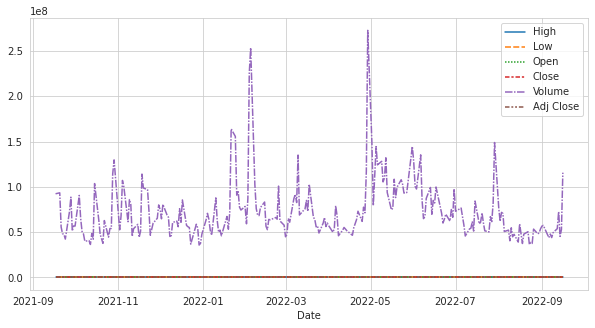

In [40]:
plt.figure(figsize=(10,5))
sns.lineplot(data = AMZN)


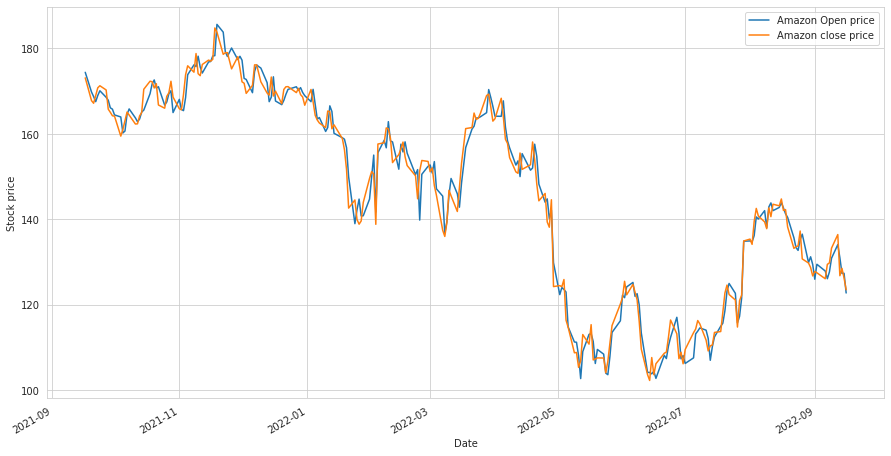

In [41]:
plt.figure(figsize=(15,8))
AMZN['Open'].plot(label ='Amazon Open price')
AMZN['Close'].plot(label ='Amazon close price')
plt.ylabel("Stock price")
plt.legend()
plt.show()

In [42]:
# Amazon's Stock’s minimum, maximum, and average price was 
AMZN.describe()

,High,Low,Open,Close,Volume,Adj Close
count,252.000000,252.000000,252.000000,252.000000,2.520000e+02,252.000000
mean,148.729611,144.209463,146.544111,146.403383,7.225242e+07,146.403383
std,22.786280,23.121207,23.013171,22.887678,3.163157e+07,22.887678
min,104.580002,101.260002,102.750000,102.309998,3.575400e+07,102.309998
25%,128.784996,123.772499,126.090002,126.064625,5.266600e+07,126.064625
50%,154.014755,148.806747,151.586998,151.167747,6.405900e+07,151.167747
75%,168.529877,164.878254,166.775002,166.404995,8.279950e+07,166.404995
max,188.107498,183.785995,185.634506,184.802994,2.726620e+08,184.802994


In [43]:
# Data cleaning

 ### Creating a new column named company in each dataframe and merging all the dataframe to get a single dataframe.

In [44]:
AAPL['company']='Apple'
AMZN['company']='amazon'
MSFT['company']='microsoft'
GOOG['company']='google'

stocks=pd.concat([AAPL , AMZN , MSFT , GOOG])

In [45]:
stocks

,High,Low,Open,Close,Volume,Adj Close,company
Date,,,,,,,
2021-09-17,148.820007,145.759995,148.820007,146.059998,129868800.0,145.246124,Apple
2021-09-20,144.839996,141.270004,143.800003,142.940002,123478900.0,142.143494,Apple
2021-09-21,144.600006,142.779999,143.929993,143.429993,75834000.0,142.630753,Apple
2021-09-22,146.429993,143.699997,144.449997,145.850006,76404300.0,145.037292,Apple
2021-09-23,147.080002,145.639999,146.649994,146.830002,64838200.0,146.011826,Apple
...,...,...,...,...,...,...,...
2022-09-09,112.000000,110.000000,110.050003,111.779999,21732900.0,111.779999,google
2022-09-12,112.639999,110.930000,111.989998,111.870003,19732900.0,111.870003,google
2022-09-13,109.370003,105.000000,108.889999,105.309998,33015000.0,105.309998,google


In [46]:
# Checking basic information about stocks.
stocks.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1007 entries, 2021-09-17 to 2022-09-16
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   High       1007 non-null   float64
 1   Low        1007 non-null   float64
 2   Open       1007 non-null   float64
 3   Close      1007 non-null   float64
 4   Volume     1007 non-null   float64
 5   Adj Close  1007 non-null   float64
 6   company    1007 non-null   object 
dtypes: float64(6), object(1)
memory usage: 62.9+ KB


In [47]:
stocks.isnull().sum()

# all values are non null

High         0
Low          0
Open         0
Close        0
Volume       0
Adj Close    0
company      0
dtype: int64

In [48]:
# checking for duplicates
stocks.duplicated().sum()           #no duplicate data

0

### **Now lets check change in stock price over time**

In [49]:
Companies = stocks['company'].drop_duplicates().values
print(Companies)

['Apple' 'amazon' 'microsoft' 'google']


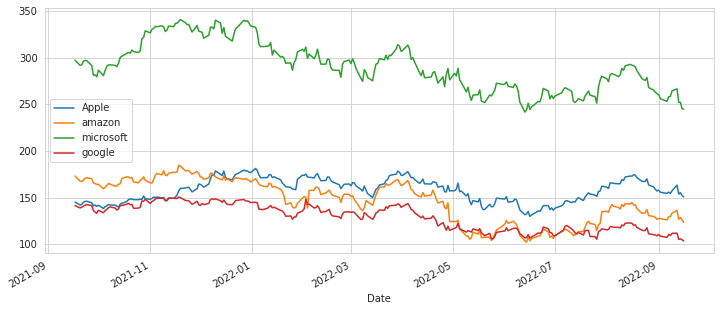

In [50]:
grouped = stocks.groupby('company')
fig, ax = plt.subplots()

for comp in Companies:
    stock = grouped.get_group(comp)
    stock['Adj Close'].plot(legend=True,figsize=(12,5), ax=ax)

ax.legend(Companies)

### Inference:

MSFT stock notched a record high on NOV-DEC 2021. But it tumbled during the recent stock market correction.

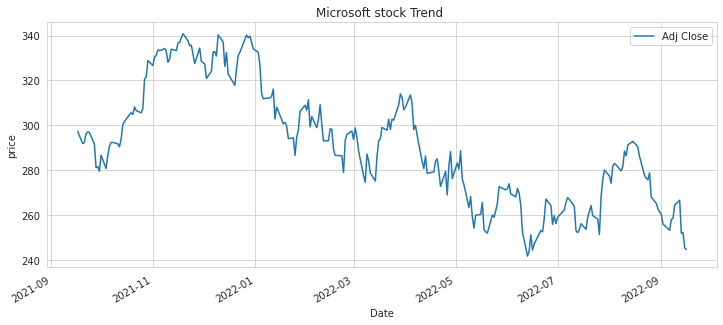

In [53]:
MSFT['Adj Close'].plot(figsize=(12,5 ) , legend=True , ylabel ='price' ,title="Microsoft stock Trend " )

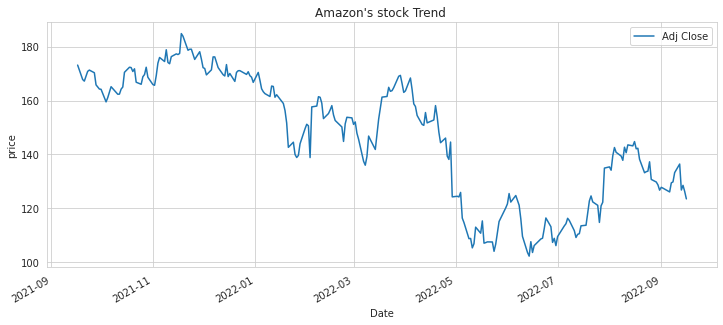

In [51]:
# price trend of amazon .

AMZN['Adj Close'].plot(figsize=(12,5 ) , legend=True , ylabel ='price' ,title="Amazon's stock Trend " )

### **Visualize the change in a stock’s volume being traded, over time .**

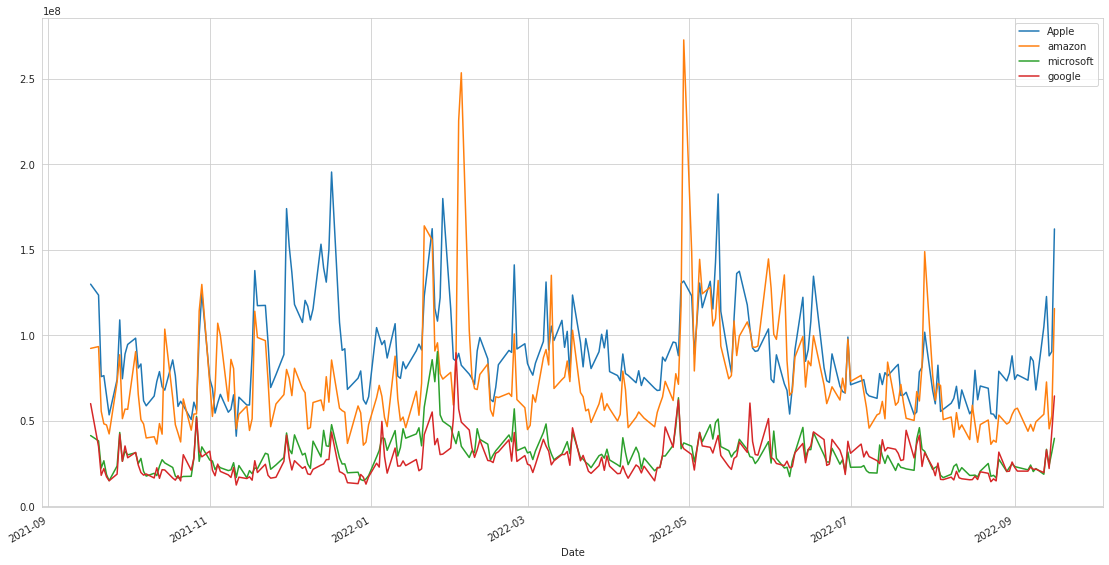

In [57]:
grouped = stocks.groupby('company')
fig, ax = plt.subplots()

for comp in Companies:
    stock = grouped.get_group(comp)
    stock['Volume'].plot(legend=True,figsize=(19,10), ax=ax)

ax.legend(Companies)

### **Inference:**

As we can observe, there was a spike in the volume in the Feb 2022 and then again in th month of May  of AMAZON.

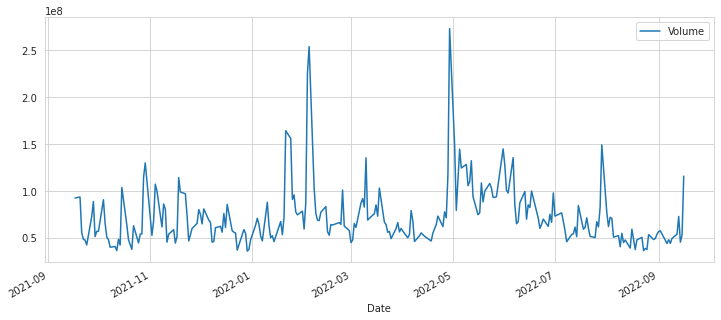

In [55]:
#Plotting the total volume being traded over time of amazon .

AMZN['Volume'].plot(legend=True, figsize=(12,5))

### **MOVING AVERAGE OF VARIOUS STOCKS :**
A moving average (MA) is a stock indicator commonly used in technical analysis, used to help smooth out price data by creating a constantly updated average price.A rising moving average indicates that the security is in an uptrend, while a declining moving average indicates a downtrend.


In [ ]:
#   MOVING AVERAGE
# --> is a smoothening method to make your data more reliable / robust

#  A moving average (MA) is a stock indicator commonly used in technical analysis, 
#  used to help smooth out price data by creating a constantly updated average price.
#  A rising moving average indicates that the security is in an uptrend, while a declining moving average indicates a downtrend.

'''
Why are the moving averages important?
--Moving averages are used to identify significant support and resistance levels.

--Traders watch for crossovers of longer-term moving averages by shorter-term moving averages 
  as possible indicators of trend changes to enter long and short positions.

  According to Stan Weinstein: The price must be above the short term MA in order to buy a stock.
'''

In [75]:
moving_avg_per_day=[20,50 ,100]

for mavg in moving_avg_per_day:
    column_name="Moving avg-%s days" %(str(mavg))

    AMZN[column_name]=AMZN['Adj Close'].rolling( window =mavg , center=False).mean()
    
AMZN.tail()

,High,Low,Open,Close,Volume,Adj Close,company,Moving avg-20 days,Moving avg-50 days,Moving avg-100 days
Date,,,,,,,,,,
2022-09-12,136.490005,134.000000,134.100006,136.449997,53826900.0,136.449997,amazon,133.750499,128.2464,122.83533
2022-09-13,131.399994,126.269997,131.009995,126.820000,72694000.0,126.820000,amazon,132.932500,128.5916,122.56355
2022-09-14,128.839996,126.330002,127.360001,128.550003,45316800.0,128.550003,amazon,132.121000,128.8926,122.36609
2022-09-15,130.369995,125.500000,127.379997,126.279999,52887200.0,126.279999,amazon,131.330000,129.1316,122.18539
2022-09-16,123.870003,120.699997,122.779999,123.529999,115612500.0,123.529999,amazon,130.391499,129.2756,121.95995


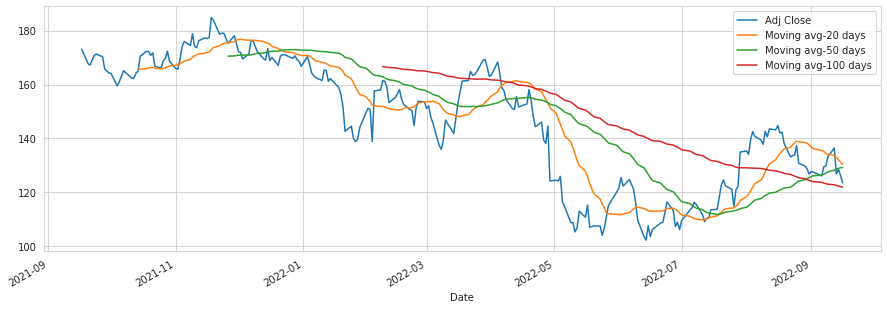

In [77]:
AMZN[['Adj Close' ,'Moving avg-20 days' ,'Moving avg-50 days' ,'Moving avg-100 days']].plot(figsize=(15,5))

### **Inference:**

Moving averages for more days have a smoother plot, as they’re less reliable on daily fluctuations. Still we can see that Amazon’s stock has been seeing a slight dip this year. 

### **DAILY RETURN average of a stock**

In [ ]:
# The daily return average of a stock

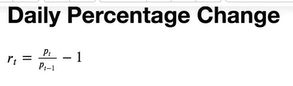

In [ ]:
AMZN['Daily Return']=(AMZN['Adj Close'] / AMZN['Adj Close'].shift(1)) -1
AMZN.head()

# shift(1)--means one value before .
# NAN for 1st because before that no value exits so you cant divide.

### OR can be calculated using .pct_change()

In [79]:
#The daily return column can be created by using the percentage change over the adjusted closing price.

AMZN['Daily Return'] = AMZN['Adj Close'].pct_change()

AMZN.tail()

,High,Low,Open,Close,Volume,Adj Close,company,Moving avg-20 days,Moving avg-50 days,Moving avg-100 days,Daily Return
Date,,,,,,,,,,,
2022-09-12,136.490005,134.000000,134.100006,136.449997,53826900.0,136.449997,amazon,133.750499,128.2464,122.83533,0.023861
2022-09-13,131.399994,126.269997,131.009995,126.820000,72694000.0,126.820000,amazon,132.932500,128.5916,122.56355,-0.070575
2022-09-14,128.839996,126.330002,127.360001,128.550003,45316800.0,128.550003,amazon,132.121000,128.8926,122.36609,0.013641
2022-09-15,130.369995,125.500000,127.379997,126.279999,52887200.0,126.279999,amazon,131.330000,129.1316,122.18539,-0.017659
2022-09-16,123.870003,120.699997,122.779999,123.529999,115612500.0,123.529999,amazon,130.391499,129.2756,121.95995,-0.021777


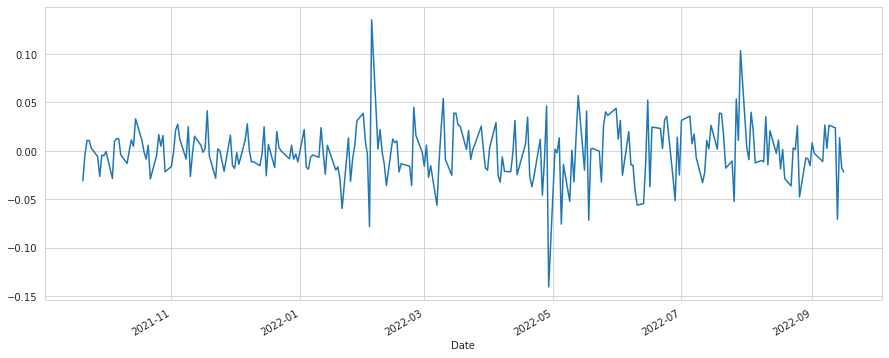

In [81]:
# VISUALIZING DAILY RETURN

AMZN['Daily Return'].plot(figsize=(15 , 6))

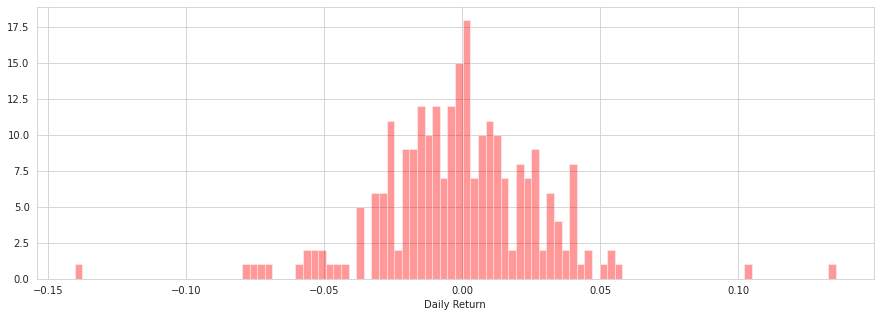

In [85]:
plt.figure(figsize=(15,5))
sns.distplot(AMZN['Daily Return'].dropna(),bins=100,color='red',kde=False, )

### Inference:

Positive daily returns are almost as frequent as negative returns for Amazon currently.

### **Adding a  new column ‘Trend’ whose values are based on the 'Daily Return'.**



In [86]:
# Adda new column ‘Trend’ whose values are based on the 'Daily Return'.

def trend(x):
  if x > -0.015 and x <= 0.015:
    return 'Slight or No change'
  elif x > 0.015 and x <= 0.04:
    return 'Slight Positive'
  elif x < -0.015 and x >= -0.4:
    return 'Slight Negative'
  elif x > 0.04 and x <= 0.06:
    return 'Positive'
  elif x < -0.04 and x >= -0.06:
    return 'Negative'
  elif x > 0.06 and x <= 0.07:
    return 'Among top gainers'
  elif x < -0.06 and x >= -0.07:
    return 'Among top losers'
  elif x > 0.07:
    return 'Bull run'
  elif x <= -0.07:
    return 'Bear drop'
AMZN['Trend']= np.zeros(AMZN['Daily Return'].count()+1)
AMZN['Trend']= AMZN['Daily Return'].apply(lambda x:trend(x))
AMZN.tail(5)

,High,Low,Open,Close,Volume,Adj Close,company,Moving avg-20 days,Moving avg-50 days,Moving avg-100 days,Daily Return,Trend
Date,,,,,,,,,,,,
2022-09-12,136.490005,134.000000,134.100006,136.449997,53826900.0,136.449997,amazon,133.750499,128.2464,122.83533,0.023861,Slight Positive
2022-09-13,131.399994,126.269997,131.009995,126.820000,72694000.0,126.820000,amazon,132.932500,128.5916,122.56355,-0.070575,Slight Negative
2022-09-14,128.839996,126.330002,127.360001,128.550003,45316800.0,128.550003,amazon,132.121000,128.8926,122.36609,0.013641,Slight or No change
2022-09-15,130.369995,125.500000,127.379997,126.279999,52887200.0,126.279999,amazon,131.330000,129.1316,122.18539,-0.017659,Slight Negative
2022-09-16,123.870003,120.699997,122.779999,123.529999,115612500.0,123.529999,amazon,130.391499,129.2756,121.95995,-0.021777,Slight Negative


### **Visualize trend frequency through a Pie Chart**

-We can visualize to see how the stock was performing for past and this year using a Pie chart



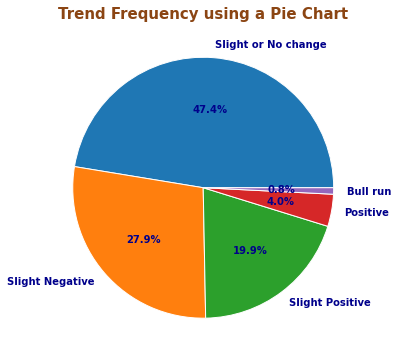

In [101]:
labels =AMZN.Trend.value_counts().index

sizes = AMZN.Trend.value_counts().values

plt.figure(figsize=(6,6))
plt.pie(sizes , labels =labels,
         textprops= {'color' : 'darkblue', 'size' : 10, 'weight' : 'bold'}, 
         autopct="%1.1f%%" , 
        )
plt.savefig('piechart.png')
plt.title("Trend Frequency using a Pie Chart",color="saddlebrown",fontsize=15 , weight="bold")
plt.show()

### Inference:

The Amazon stock was in the bull run for just about 0.8% of the time,for about 4.0% of the time period, the stock has performed positively on a given day. Likewise, for most period of time (about 47.4%) the stock showed a very slight or no change in the price.

#### **Correlation between daily returns of different stocks?**
--Merging the columns of all companies Adjacent close 

In [102]:
all_adjClose = pd.concat([AAPL['Adj Close'] ,GOOG['Adj Close'],AMZN['Adj Close'],MSFT['Adj Close']], axis = 1)

In [104]:
all_adjClose.columns = ['Apple','Google','Amazon','Microsoft']
all_adjClose

,Apple,Google,Amazon,Microsoft
Date,,,,
2021-09-17,145.246124,141.463501,173.126007,297.379395
2021-09-20,142.143494,139.016998,167.786499,291.855682
2021-09-21,142.630753,139.646500,167.181503,292.351532
2021-09-22,145.037292,140.938507,169.002502,296.100159
2021-09-23,146.011826,141.826508,170.800003,297.072021
...,...,...,...,...
2022-09-12,163.429993,111.870003,136.449997,266.649994
2022-09-13,153.839996,105.309998,126.820000,251.990005
2022-09-14,155.309998,105.870003,128.550003,252.220001


In [105]:
pct_df = all_adjClose.pct_change()
pct_df.tail()

,Apple,Google,Amazon,Microsoft
Date,,,,
2022-09-12,0.038508,0.000805,0.023861,0.008281
2022-09-13,-0.058680,-0.058640,-0.070575,-0.054978
2022-09-14,0.009555,0.005318,0.013641,0.000913
2022-09-15,-0.018930,0.000000,-0.017659,-0.027119
2022-09-16,-0.010960,-0.021158,-0.021777,-0.002608


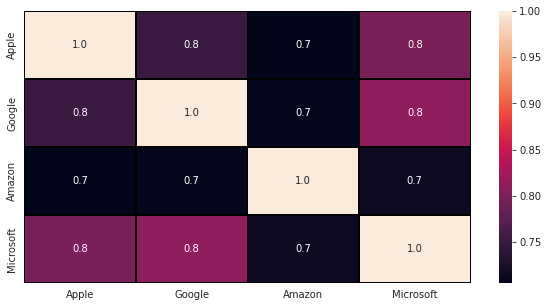

In [109]:
f,ax=plt.subplots(figsize=(10,5))

sns.heatmap(pct_df.corr(), annot=True, linewidths=0.5, linecolor="black", fmt=".1f", ax=ax)  

### Inference:

Microsoft , Apple , Google seems to have the highest correlation.
But another interesting thing to note is that all tech companies that we explored are positively correlated.